In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Shanelynch/datasets/main/wine-clustering.csv")
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

1. Alcohol (Спиртовое вещество): 
Процентное содержание алкоголя в вине. Этот параметр измеряет количественное содержание этанола в вине и влияет на его крепость.

2. Malic Acid (Яблочная кислота):
Количество яблочной кислоты в вине. Яблочная кислота придает вину свежесть и яркость.

3. Ash (Зольность):
Количество минеральных веществ (золы) в вине после испарения воды и сжигания остатков. Он отражает минеральность вина.

4. Alcalinity of Ash (Щелочность золы): 
Щелочность золы в вине. Щелочность измеряет pH-уровень вина и влияет на его вкусовые характеристики.

5. Magnesium (Магний): 
Количество магния в вине. Магний является одним из микроэлементов, которые могут влиять на вкус и аромат вина.

6. Total Phenols (Общее количество фенолов): 
Общее количество фенольных соединений в вине. Фенолы являются антиоксидантами и могут влиять на вкус и цвет вина.

7. Flavanoids (Флавоноиды): 
Количество флавоноидов в вине. Флавоноиды также являются фенольными соединениями и могут вносить вклад в вкус и цвет вина, а также обладают антиоксидантными свойствами.

8. Nonflavanoid Phenols (НЕ флавоноидные фенолы): 
Количество не флавоноидных фенольных соединений в вине.

9. Proanthocyanins (Проантоцианидины): 
Количество проантоцианидинов в вине. Проантоцианидины также относятся к группе фенольных соединений.

10. Color Intensity (Интенсивность цвета): 
Интенсивность цвета вина, измеряется как абсорбция света при определенной длине волны. Этот параметр связан с глубиной цвета вина.

11. Hue (Оттенок): 
Оттенок вина, измеряется на цветовой шкале. Это значение может варьироваться от оранжевого до фиолетового и связано с цветовой тонкостью вина.

12. OD280/OD315 of Diluted Wines (Оптическая плотность при разбавленных винах): 
Оптическая плотность вина при определенной длине волны. Этот параметр может быть связан с содержанием вина антоцианов (пигменты, придающие вину красный цвет).

13. Proline (Пролин): 
Количество аминокислоты пролина в вине. Пролин может влиять на текстуру и структуру вина.

In [3]:
df.isnull().sum()
#Нулевых значений не обнаруженно 

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
df.shape

(178, 13)

## Обнаружение аномалий

In [5]:
df.isnull().sum().sort_values(ascending=False).head()
#Столбцов с пропущенными значениями не обнаруженно

Alcohol         0
Malic_Acid      0
Ash             0
Ash_Alcanity    0
Magnesium       0
dtype: int64

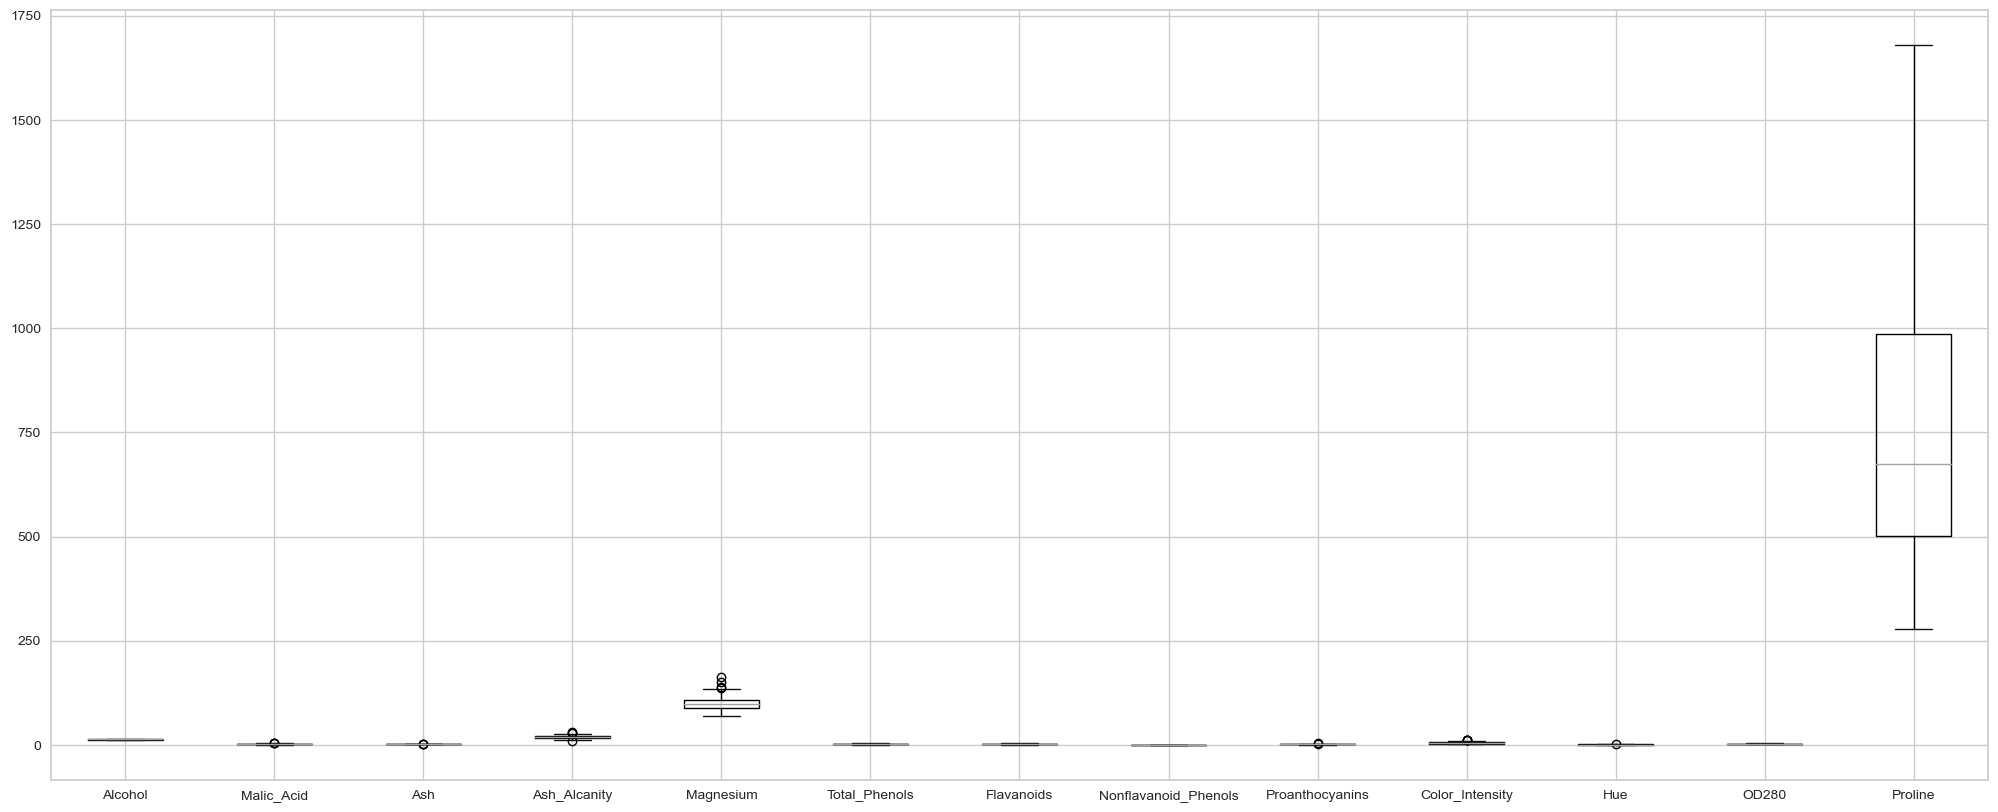

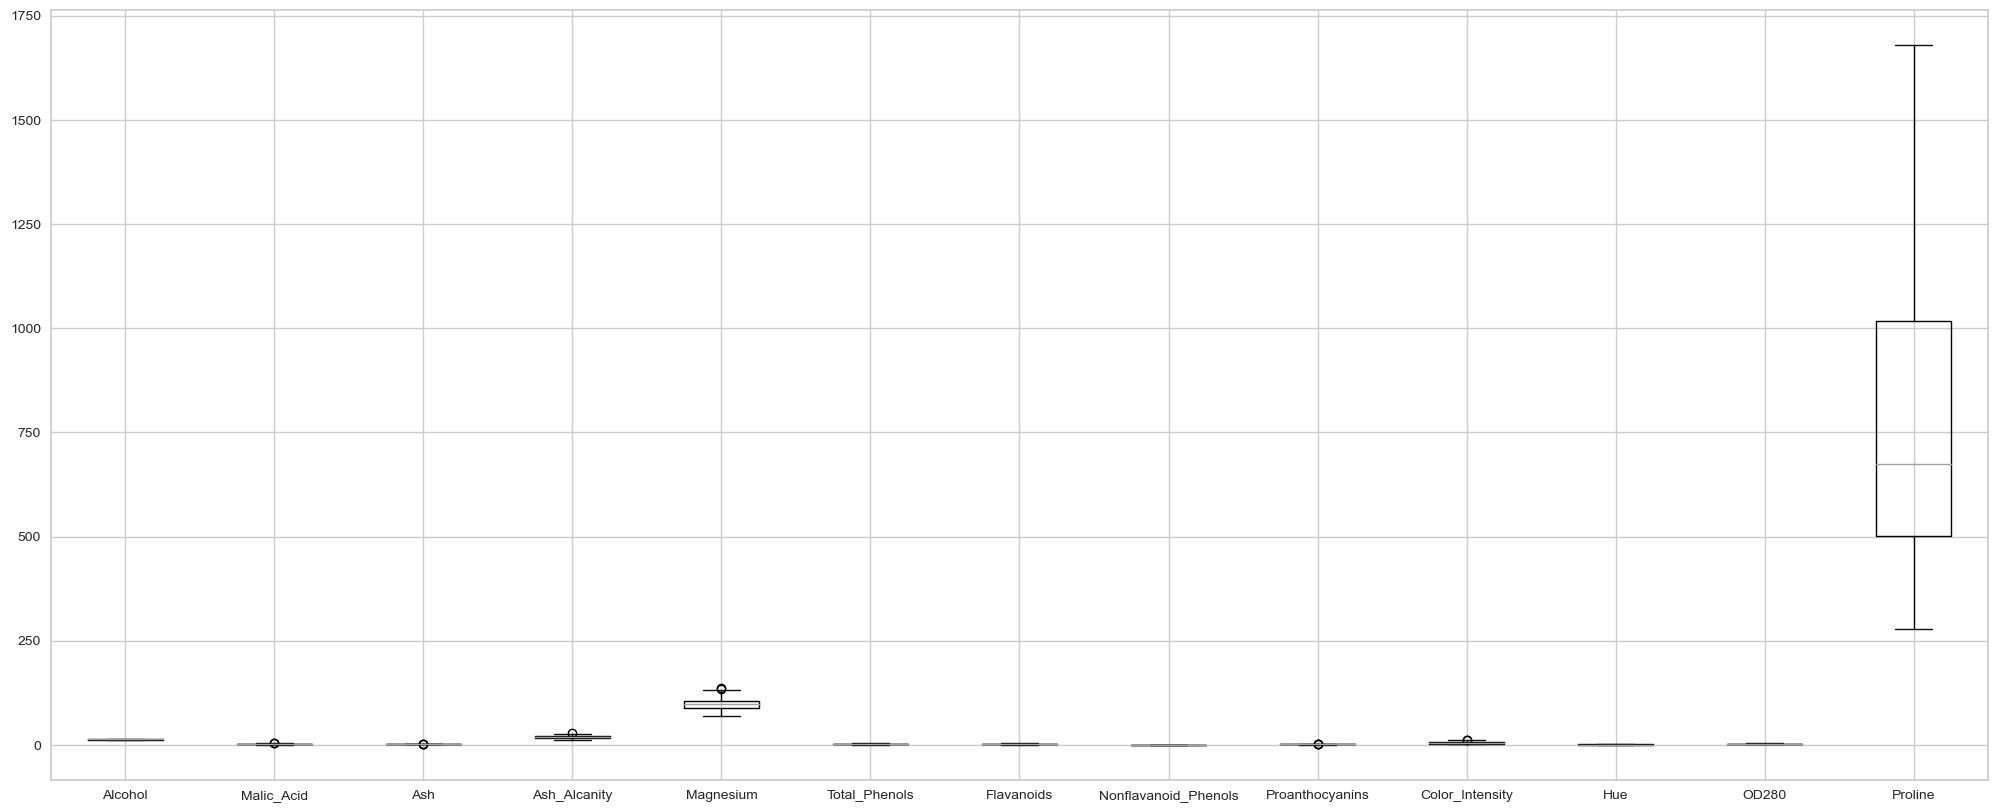

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
df.boxplot()  

# Находим среднее и стандартное отклонение
mean = df.mean()
std = df.std()

# Определяем границы для удаления выбросов
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Удаляем выбросы
filtered_df = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Показываем обновленный график без выбросов
plt.figure(figsize=(25, 10))
filtered_df.boxplot() 

plt.show()


In [7]:
filtered_df.shape

(168, 13)

Построим матрицу корреляции и выявил переменные, которые сильно коррелируют между собой 

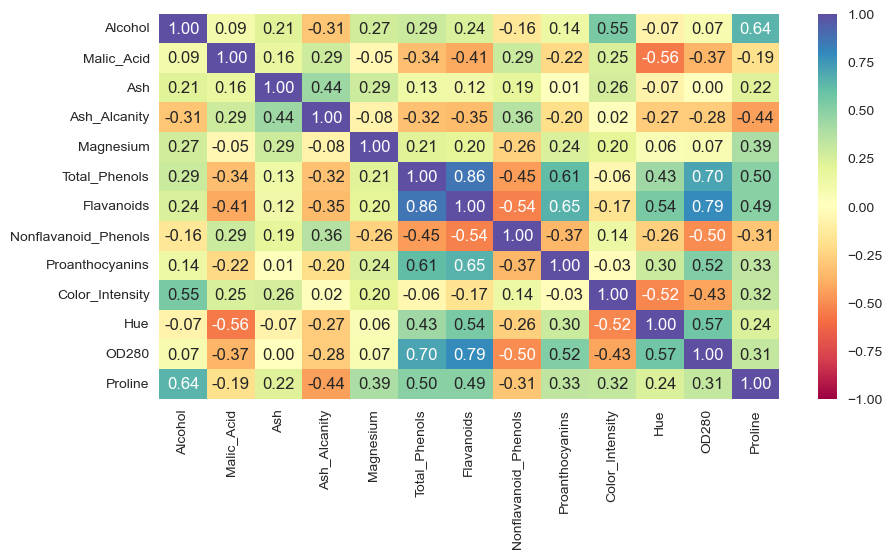

In [8]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = '.2f',  cmap = 'Spectral')
plt.show()

* Alcohol сильно коррелирует с Proline
* Total phenols сильно коррелирует с OD280, Proanthocyanins и Flavanoids
* Flavanoids сильно коррелирует с OD280 и Proanthocyanins
* Malic Acid имеет среднюю отрицательную корреляцию с Hue
* Flavanoids имеет среднюю отрицательную корреляцию с Non flavanoid phenols
* Non flavanoid phenols имеет среднюю отрицательную корреляцию с OD280
* Color intensity имеет среднюю отрицательную корреляцию с Hue.

In [9]:

# Стандартизируем данные
filtered_df= StandardScaler().fit_transform(filtered_df)
scaled_df = pd.DataFrame(data=filtered_df, columns=df.columns)
scaled_df.head()


Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.513539   -0.578842  0.250637     -1.209653   2.253466       0.840250   
1  0.210929   -0.514888 -0.945351     -2.624711   0.097439       0.600640   
2  0.160342    0.015009  1.240421     -0.244840   0.177292       0.840250   
3  1.690593   -0.359574  0.539324     -0.823728   1.135526       2.517517   
4  0.261516    0.225141  2.065240      0.527010   1.534790       0.840250   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.068668             -0.669081         1.395565         0.233962   
1    0.763248             -0.830933        -0.517348        -0.329398   
2    1.251920             -0.507230         2.380432         0.251846   
3    1.506437             -0.992784         1.187228         1.199721   
4    0.691983              0.221100         0.505398        -0.356225   

        Hue     OD280   Proline  
0  0.403766  1.857453  0.980537  
1  0.449249  1.127605  0.933414  
2  0.358284  0.804788  1.357515  
3 -0.414920  1.197783  2.284254  
4  0.403766  0.467935 -0.056154

 Провели EDA  и стандартизацию данных. Можно заменить, что набор данных мал, и использование PCA не является необходимым. Но все же осуществим PCA

## PCA

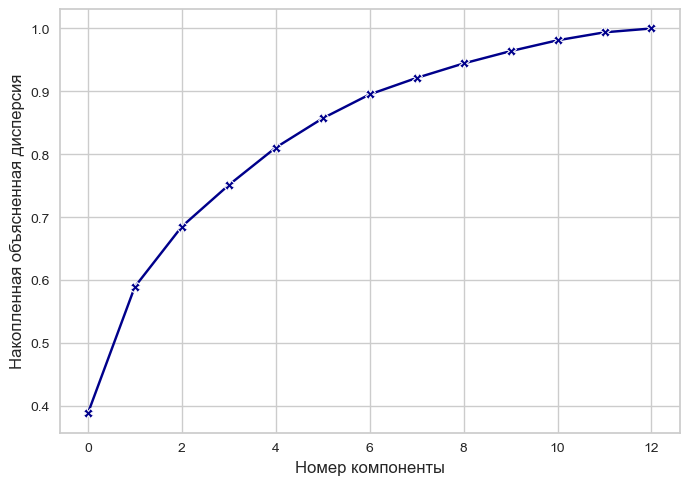

In [10]:
pca = PCA()

X = filtered_df

pca.fit(X)

explained_variance = pca.explained_variance_ratio_


explained_variance_df = pd.DataFrame({
    'explained_variance_ratio': explained_variance,
    'cumsum_variance': np.cumsum(explained_variance)
})


sns.lineplot(data=explained_variance_df, x=explained_variance_df.index, y='cumsum_variance',
             marker='X', color='darkblue')
plt.xlabel('Номер компоненты', fontsize=12)
plt.ylabel('Накопленная объясненная дисперсия', fontsize=12)

plt.show()

С использованим varience_ratio мы поняли, как наши компоненты описывают изментельность данных. Используя только 2-5 компоненты, мы можем получить 99,9% от вариантности нашего набора данных в этом случае. Вторая важная задача - выбор количества кластеров алгоритме KMeans. Мы будем использовать 3 компоненты и регулировать кластеры

## KMeans

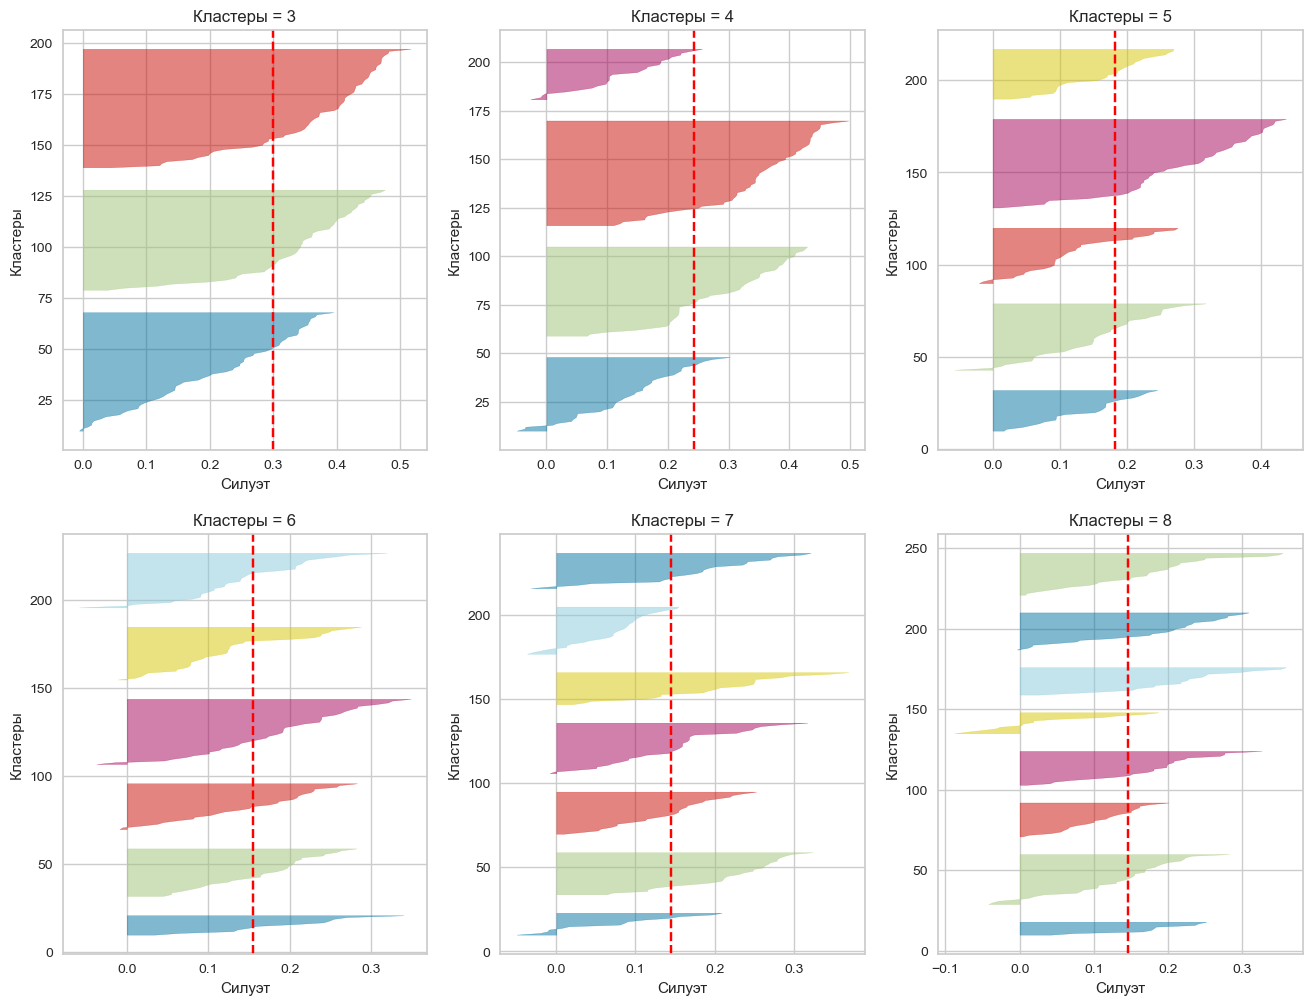

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(16,12))
for i in list(range(3,9)):
    kmeans = KMeans(n_clusters=i, n_init=10) 
    q, mod = divmod(i, 3)
    visualizer= SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1, mod])
    visualizer.fit(filtered_df)
    visualizer.ax.set_title(f'Кластеры = {i}')
    visualizer.ax.set_xlabel('Силуэт')
    visualizer.ax.set_ylabel('Кластеры')


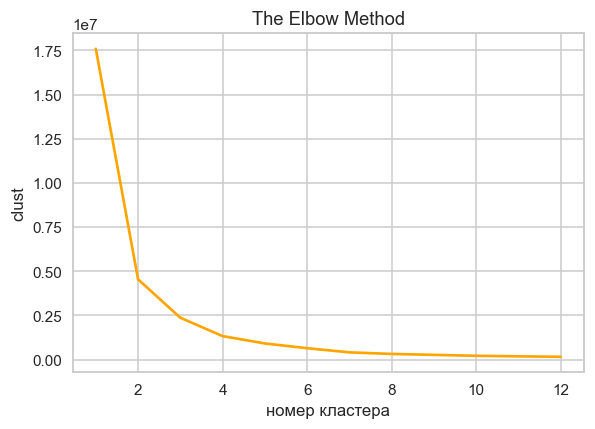

In [12]:
standardized_data = StandardScaler().fit_transform(filtered_df)
clust = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    clust.append(kmeans.inertia_)

plt.figure(figsize=(6, 4), dpi=110)
plt.plot(range(1, 13), clust, color='orange')
plt.title('The Elbow Method')
plt.xlabel('номер кластера')
plt.ylabel('clust')
plt.show()

Из данных графиков можно сделать вывод, что наиболее оптимальное количество кластеров 3-5, 3 лучшее

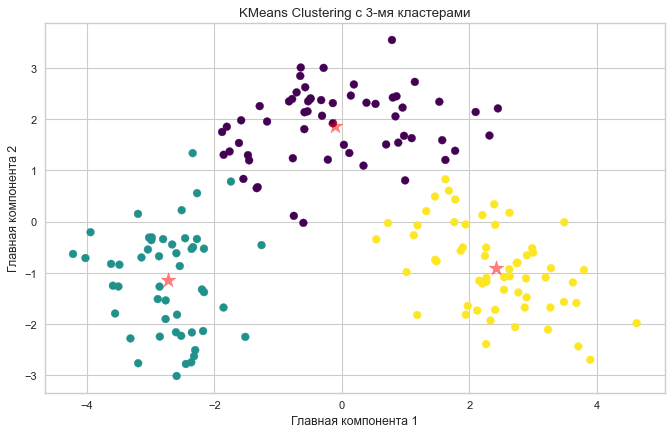

In [13]:

X_pca = pca.transform(filtered_df)[:, :3]

# Производим кластеризацию с помощью KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_pca)

# Добавляем метки кластеров 
scaled_df['Cluster'] = kmeans.labels_

# Визуализируем результаты кластеризации
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', alpha=0.5, s=200)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('KMeans Clustering с 3-мя кластерами')
plt.show()


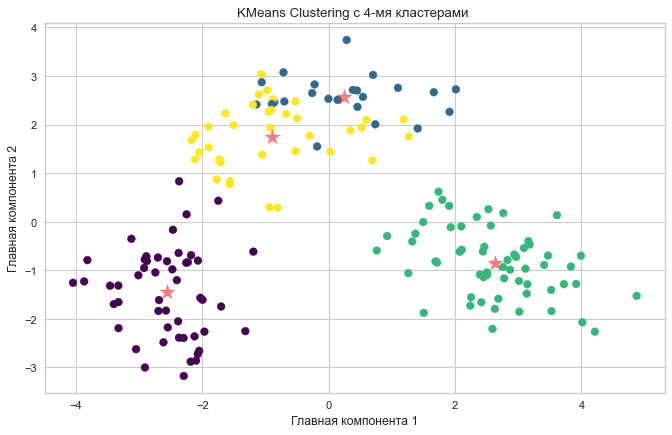

In [14]:
# Выбираем 3 переменные из графика PCA(выше)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_df)

# Производим кластеризацию с помощью KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(X_pca)

# Добавляем метки кластеров 
scaled_df['Cluster'] = kmeans.labels_

# Визуализируем результаты кластеризации
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', alpha=0.5, s=200)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('KMeans Clustering с 4-мя кластерами ')
plt.show()

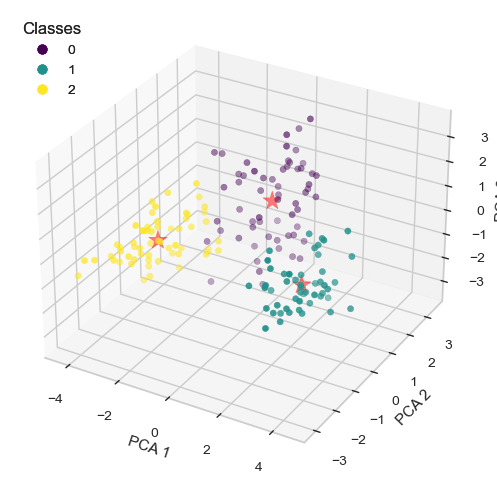

In [15]:
# Выбираем 5 переменные из графика PCA(выше)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(scaled_df)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_pca)
labels = kmeans.labels_

# 3D визуализация
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='*', s=200, alpha=0.5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


In [16]:
filtered_df = StandardScaler().fit_transform(filtered_df)
scaled_df = pd.DataFrame(data=filtered_df, columns=df.columns)
scaled_df.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.513539   -0.578842  0.250637     -1.209653   2.253466       0.840250   
1  0.210929   -0.514888 -0.945351     -2.624711   0.097439       0.600640   
2  0.160342    0.015009  1.240421     -0.244840   0.177292       0.840250   
3  1.690593   -0.359574  0.539324     -0.823728   1.135526       2.517517   
4  0.261516    0.225141  2.065240      0.527010   1.534790       0.840250   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.068668             -0.669081         1.395565         0.233962   
1    0.763248             -0.830933        -0.517348        -0.329398   
2    1.251920             -0.507230         2.380432         0.251846   
3    1.506437             -0.992784         1.187228         1.199721   
4    0.691983              0.221100         0.505398        -0.356225   

        Hue     OD280   Proline  
0  0.403766  1.857453  0.980537  
1  0.449249  1.127605  0.933414  
2  0.358284  0.804788  1.357515  
3 -0.414920  1.197783  2.284254  
4  0.403766  0.467935 -0.056154

Сделаем кластеризацию K-means для всех переменных датасета

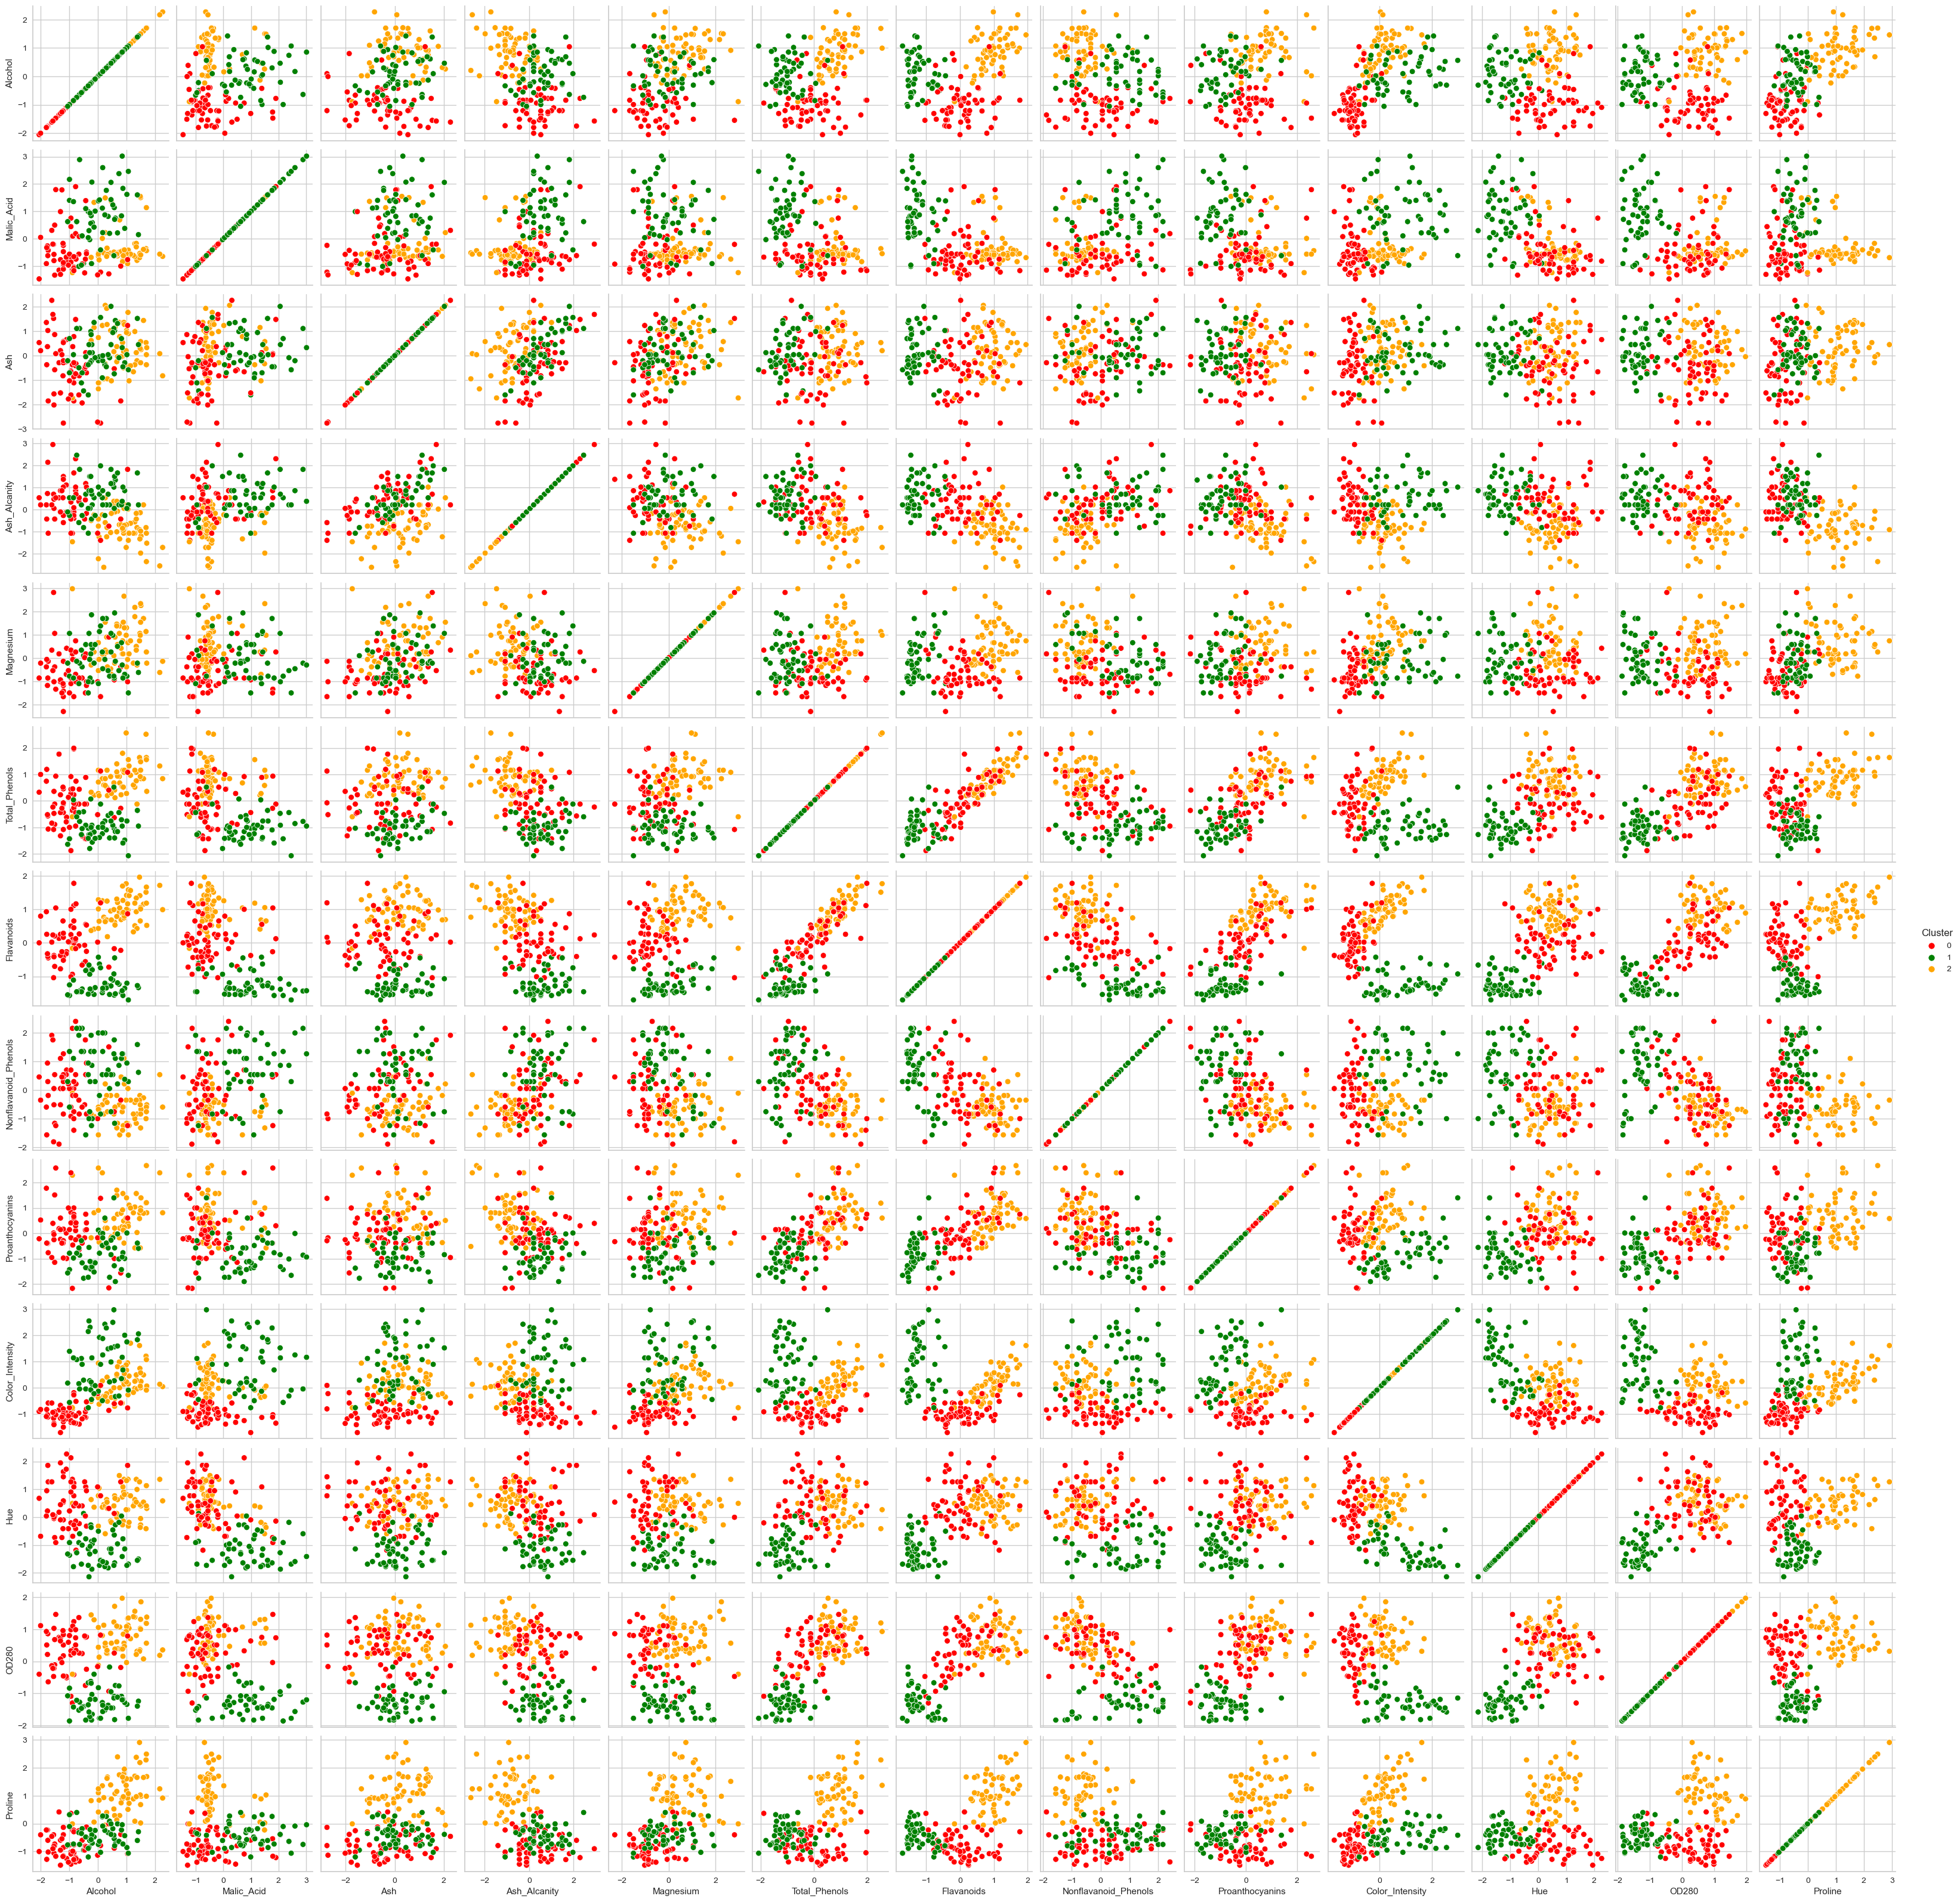

In [17]:

# Производим кластеризацию с помощью KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X_pca)

# Добавляем метки кластеров 
scaled_df['Cluster'] = kmeans.labels_

# Визуализация
sns.pairplot(scaled_df, hue='Cluster', palette={0:'red', 1:'green', 2:'orange'}, diag_kind=None)
plt.show()


## Dbscan

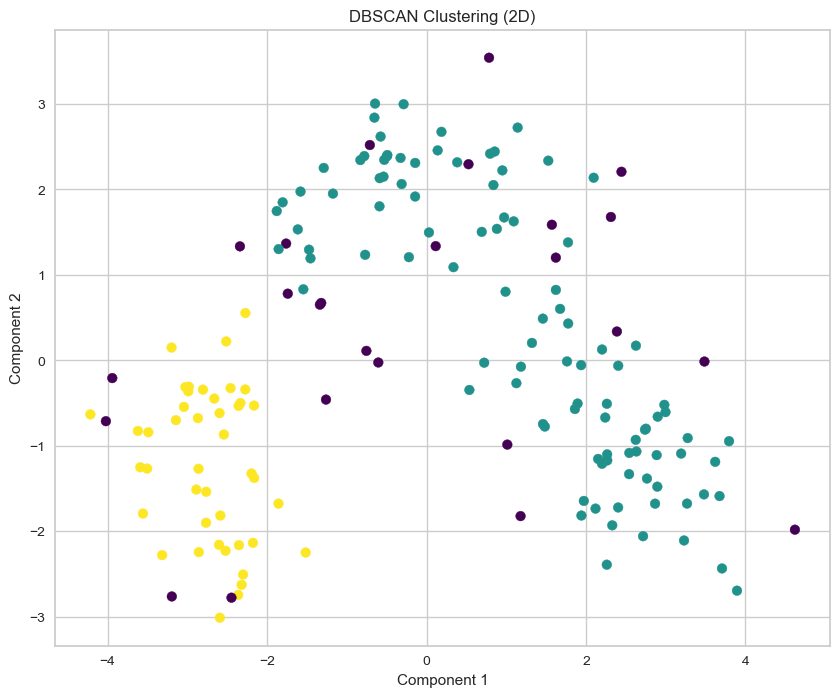

In [26]:
# Выбираем 3 переменные из графика PCA(выше)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_df)

# Проводим кластеризацию DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('DBSCAN Clustering (2D)')
plt.show()


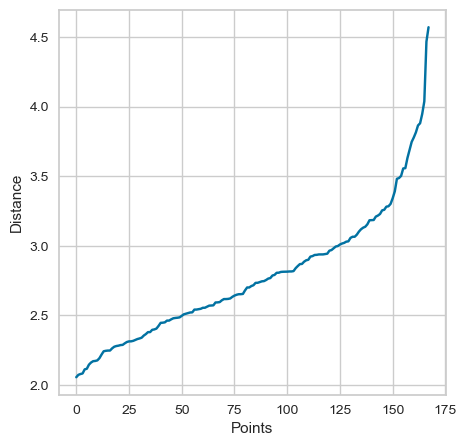

In [19]:
from sklearn.neighbors import NearestNeighbors
standardized_data_2c = StandardScaler().fit_transform(filtered_df)
X = standardized_data_2c  
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

plt.savefig("Distance_curve.png", dpi=300)

Оптимальное значение эпсилона находится в точке максимальной кривизны на графике K-дистанции, которая в данном случае равна 4.5
.

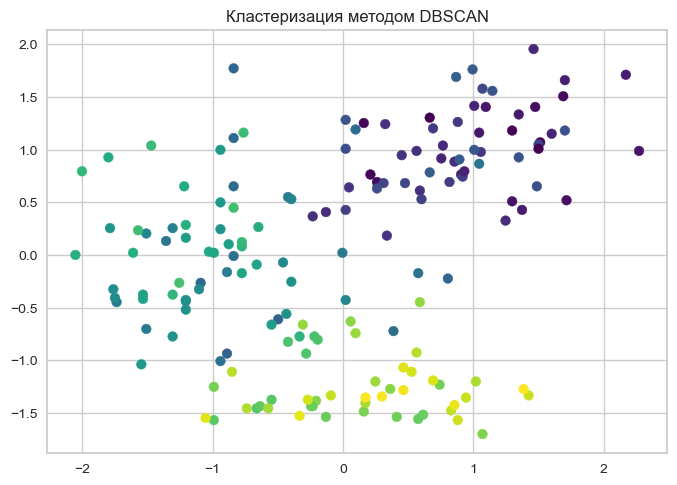

In [20]:


standardized_data_2c = StandardScaler().fit_transform(filtered_df)

dbscan = DBSCAN(eps=1.5, min_samples=1)

dbscan.fit(standardized_data_2c)

cluster_labels = dbscan.labels_

plt.scatter(standardized_data_2c[:, 0], standardized_data_2c[:, 6], c=cluster_labels, cmap='viridis')

plt.title('Кластеризация методом DBSCAN')
plt.show()


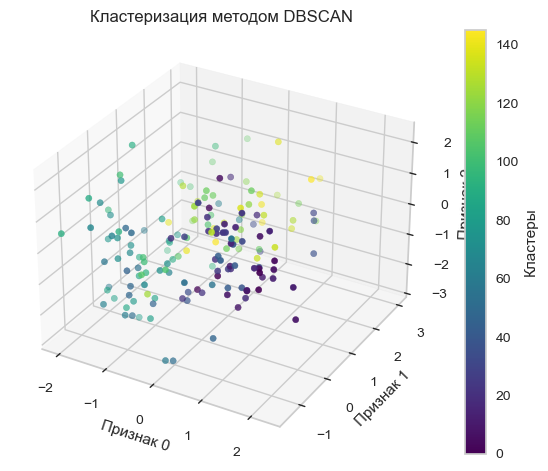

In [28]:
standardized_data_3c = StandardScaler().fit_transform(filtered_df)

dbscan = DBSCAN(eps=1.5, min_samples=1)
dbscan.fit(standardized_data_3c)
cluster_labels = dbscan.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Выбираем соответствующие признаки (0, 1, 2) для осей x, y, z
x = standardized_data_3c[:, 0]
y = standardized_data_3c[:, 1]
z = standardized_data_3c[:, 2]

scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='viridis')


ax.set_title('Кластеризация методом DBSCAN')
ax.set_xlabel('Признак 0')
ax.set_ylabel('Признак 1')
ax.set_zlabel('Признак 2')


legend = plt.colorbar(scatter)
legend.set_label('Кластеры')


plt.show()


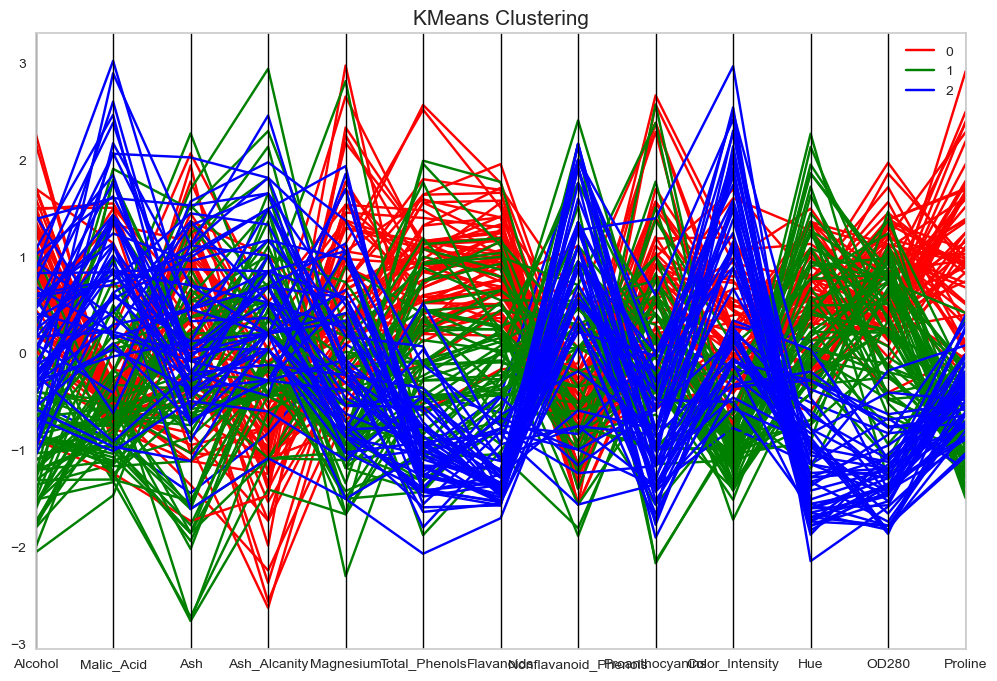

In [22]:
filtered_df = StandardScaler().fit_transform(filtered_df)
scaled_df = pd.DataFrame(data=filtered_df, columns=df.columns)

# Выполняем кластеризацию с помощью KMeans
kmeans = KMeans(n_clusters=3,n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(filtered_df)

# Создаем DataFrame с метками кластеров
cluster_df = pd.DataFrame({
    'KMeans Cluster': kmeans_labels,

})

# Добавляем метки кластеров к изначальному DataFrame (filtered_df)
final_df = pd.concat([scaled_df, cluster_df], axis=1)

# Визуализация в параллельных координатах для KMeans Clustering
plt.figure(figsize=(12, 8))

# Выбираем только признаки (без колонок 'KMeans Cluster' и 'DBSCAN Cluster')
features = final_df.drop(['KMeans Cluster'], axis=1)

# Добавляем колонку 'Cluster' с метками кластеров KMeans
features['Cluster'] = final_df['KMeans Cluster']

# Строим график
pd.plotting.parallel_coordinates(features, 'Cluster', color=('red', 'green', 'blue'))

plt.title('KMeans Clustering', fontsize=15)
plt.show()

